In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data import

Import the data from the dataset and print out the name of each feature

In [2]:
PR_data = pd.read_csv('new_pullreq.csv')
pd.set_option('display.max_columns', None)
PR_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.04600,0.00000,0.000000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.0,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.0,1.0,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,0,0,1,1,0,0,0,0,2,2,1,474.0,2,0.014019,38,147.48200,16.18700,21.582700,1,299,1.000000,38,0,0,0,2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1312,NaN,1.0,79.0,1.0,0.0,1.0,failure,failure,Python,1,6,1,1.000000,7,NaN,9.0,432,0,1092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,300,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,0,0,2,2,2,0,0,0,0,0,0,143159.0,5,0.014706,24,120.71000,0.00000,10.109800,2194,293,0.989761,222,110,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,94,NaN,1.0,489.0,1.0,1.0,0.0,success,success,Go,269,37,212,0.986523,29,NaN,978.0,1050,0,3489,1,male,canada,NaN,0.814346,0.633765,0.471257,0.666831,0.485847,0.0,0.000000,0.000000,NaN,679,NaN,NaN,0.818143,0.630804,0.466899,0.650931,0.496465,0.0,0.0,0.0,NaN,1,460,0.138889,NaN,NaN,0.003796,0.002961,0.004358,0.015900,0.010618,0,0,0,0,0,0,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,0,0,2,2,2,0,0,0,1,1,1,6247.0,2,0.173077,7,554.16800,28.61830,84.142200,131,3,1.000000,1,60,0,0,

In [3]:
PR_data[PR_data['project_id'] == 13708387]

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.046,0.00000,0.0000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.000000,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.000000,1.000000,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
4488,4489,13708387,stylelint,stylelint,1,7769,7769.0,7,218,103,3,0,4,7,3,0,1,3,22,39,3,6477.0,5,0.116910,69,681.062,0.00000,0.0000,673,1,1.000000,345,263,58,14,39,0.102564,0.230769,0.666667,3,1,2,2,0,0,1,0,71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,30,14,42,0.979351,5,12.0,14714.0,2,0,1497,0,male,united kingdom,NaN,0.813158,0.593229,0.444595,0.701420,0.529748,0.272727,0.272727,0.454545,neutral,142,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.285714,0.714286,neutral,0,13,0.428571,NaN,NaN,0.003895,0.061230,0.047270,0.036098,0.006232,1,1,1,1,1,1,0,11,17,0,3.0,0,0.001325,0,7769,0
5279,5280,13708387,stylelint,stylelint,1,589,589.0,2,212,244,4,0,22,26,21,1,4,0,1,1,1,19323.0,11,0.094156,20,713.504,9.59286,18.1182,3474,298,0.983221,64,398,58,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,1,24,NaN,1.0,29885.0,1.0,1.0,0.000000,success,success,JavaScript,316,30,80,0.979310,37,NaN,261.0,1375,0,2224,1,NaN,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.000000,0.000000,1.000000,neutral,428,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,449,0.186047,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,0,1,0,0,0.0,0,0.286101,0,589,0
6798,6799,13708387,stylelint,stylelint,1,14642,14642.0,3,8,0,0,0,1,1,1,0,0,0,7,7,4,18893.0,11,0.151420,2,711.504,9.60481,18.2629,3321,0,0.000000,6,6,2,0,7,0.000000,0.000000,1.000000,4,0,0,0,0,0,1,0,19,NaN,1.0,403.0,2.0,0.0,0.500000,failure,success,JavaScript,300,29,69,0.978817,37,7.0,284613.0,1,1,1879,0,NaN,NaN,NaN,0.804032,0.659139,0.463307,0.655809,0.469856,0.000000,0.000000,1.000000,neutral,403,NaN,NaN,0.817052,0.654459,0.491865,0.665323,0.523516,0.0,0.000000,0.000000,NaN,0,4,0.069767,NaN,NaN,0.013020,0.004680,0.028558,0.00951

In [4]:
for column in PR_data.columns:
    print(column)

id
project_id
ownername
reponame
merged_or_not
lifetime_minutes
mergetime_minutes
num_commits
src_churn
test_churn
files_added
files_deleted
files_modified
files_changed
src_files
doc_files
other_files
num_commit_comments
num_issue_comments
num_comments
num_participants
sloc
team_size
perc_external_contribs
commits_on_files_touched
test_lines_per_kloc
test_cases_per_kloc
asserts_per_kloc
watchers
prev_pullreqs
requester_succ_rate
followers
churn_addition
churn_deletion
pr_comment_num
comment_num
perc_neg_emotion
perc_pos_emotion
perc_neu_emotion
part_num_issue
part_num_commit
part_num_pr
part_num_code
comment_conflict
hash_tag
at_tag
test_inclusion
description_length
bug_fix
ci_exists
ci_latency
ci_build_num
ci_test_passed
ci_failed_perc
ci_first_build_status
ci_last_build_status
language
fork_num
project_age
open_issue_num
pr_succ_rate
open_pr_num
first_response_time
pushed_delta
acc_commit_num
first_pr
account_creation_days
core_member
contrib_gender
contrib_country
contrib_affiliati

# Data cleaning

To select the features we want from 118 Numbers,and get a new dataframe named **Project_feature_data**.

In [5]:
Project_feature_data = PR_data[[
    'project_id', 'language', 'project_age', 'pushed_delta', 'pr_succ_rate',
    'open_issue_num', 'open_pr_num', 'fork_num', 'merged_or_not', 'core_member'
]]
Project_feature_data

,project_id,language,project_age,pushed_delta,pr_succ_rate,open_issue_num,open_pr_num,fork_num,merged_or_not,core_member
0,13708387,JavaScript,21,196583.0,0.978469,52,25,140,1,0
1,100297899,Python,6,9.0,1.000000,1,7,1,0,1
2,93139005,JavaScript,6,5743.0,0.996324,0,10,11,1,1
3,15059440,Go,37,978.0,0.986523,212,29,269,1,1
4,29684214,Python,25,517153.0,0.978495,93,9,64,1,0
...,...,...,...,...,...,...,...,...,...,...
3347932,30544060,JavaScript,20,18087.0,1.000000,2,0,0,1,1
3347933,1142,Python,55,431.0,0.965155,3359,372,2454,0,1
3347934,31499094,JavaScript,9,78766.0,0.992126,62,8,125,1,0
3347935,55317,JavaScript,27,995650.0,0.991597,174,0,84,0,0


In [6]:
Project_feature_data.isna().sum() 

project_id            0
language              0
project_age           0
pushed_delta      20542
pr_succ_rate      10203
open_issue_num        0
open_pr_num           0
fork_num              0
merged_or_not         0
core_member           0
dtype: int64

The statistics are centralized with how many projects, and there are 112,30 projects.

In [7]:
Project_data = Project_feature_data[['project_id']].drop_duplicates(subset=['project_id'])
Project_data

,project_id
0,13708387
1,100297899
2,93139005
3,15059440
4,29684214
...,...
632247,41631382
661336,81645409
691799,5621076
765017,109398748


# Function use to draw picture

In [8]:
def picture_sameX_plot(list1, list2, xlabel=None):
    fig, ax1 = plt.subplots(figsize=(12, 4))
    x = list(range(len(list1)))
    ax1.plot(x, list1, c='r')
    ax1.set_ylabel('Merged')
    ax2 = ax1.twinx()
    ax2.plot(x, list2, c='g')
    ax2.set_ylabel('Merge Failed')
    plt.xticks(x, xlabel)
    plt.show()

In [9]:
def picture_double_plot(list1, list2, xlabel=None):
    plt.figure(figsize=(12, 4))
    x = list(range(len(list1)))
    plt.plot(x, list1, c='r', label='Merge')
    plt.plot(x, list2, c='g', label='Merge Failed')
    plt.legend()
    plt.xticks(x, xlabel)
    plt.show()

In [10]:
def picture_double_bar(list1, list2, tick_label, width=0.4):
    plt.figure(figsize=(20, 10))
    x = list(range(len(list1)))
    plt.bar(x, list1, width=width, label='Merged', fc='b')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x,
            list2,
            width=width,
            label='Merge Failed',
            tick_label=tick_label,
            fc='orange')
    plt.legend()
    plt.show()

In [117]:
def picturehist(x,
                minvalue,
                maxvalue,
                distance,
                binvalue=10,
                rwidth=0.8,
                xlabel=None,
                ylabel=None,
                figname=None):
    plt.figure(figsize=(20, 10))
    plt.hist(x, bins=binvalue, histtype='bar', rwidth=0.4)
    plt.xticks(range(minvalue, maxvalue)[::distance])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figname)
    plt.show()
    


def count(x):
    M = 0
    MF = 0
    counts = list()
    for i in x:
        if i[1] == 1:
            M += 1
        else:
            MF += 1
    counts.append(M)
    counts.append(MF)
    return counts

# Characteristics1:Program language

First of all, the data set will be processed, and the program language of each project will be counted.

In [12]:
program_language = Project_feature_data[['project_id','language']].drop_duplicates(subset=['project_id'])
language_num=program_language['language'].value_counts().tolist()
language = ['JavaScript','Python','Java','Ruby ','Go','Scala']
print(language_num)

[3879, 3055, 1823, 1243, 913, 317]


## Bar：

<ipython-input-13-1e0ec28d3d7c>:15: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=s,


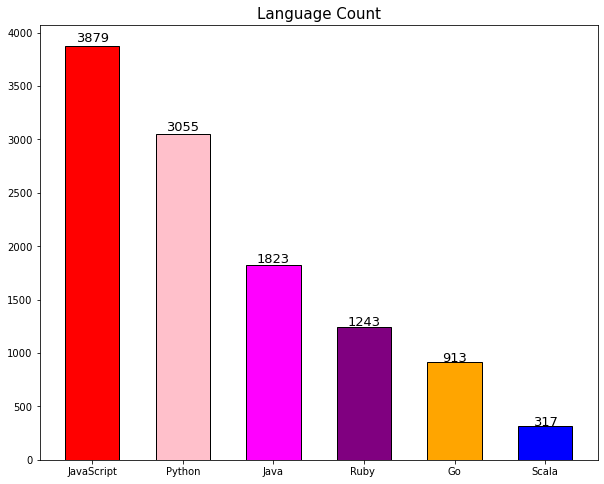

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'pink', 'magenta', 'purple', 'orange', 'blue']
ax.bar(x=language,
       height=language_num,
       width=0.6,
       align="center",
       color=colors,
       edgecolor="black",
       linewidth=1.0)
ax.set_title("Language Count", fontsize=15)
xticks = ax.get_xticks()
for i in range(len(language_num)):
    xy = (xticks[i], language_num[i] * 1.01)
    s = str(language_num[i])
    ax.annotate(s=s,
                xy=xy,
                fontsize=13,
                color="black",
                ha="center",
                va="baseline")

## Pie：

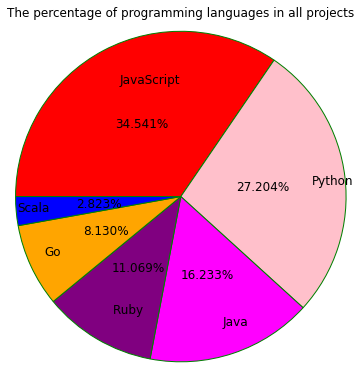

In [14]:
plt.axes(aspect='equal')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.pie(x=language_num,
        labels=language,
        colors=colors,
        autopct='%.3f%%',
        pctdistance=0.5,
        labeldistance=0.8,
        startangle=180,
        center=(2.5, 1),
        radius=3.8,
        counterclock=False,
        wedgeprops={
            'linewidth': 1,
            'edgecolor': 'green'
        },
        textprops={
            'fontsize': 12,
            'color': 'black'
        },
        frame=1)
plt.xticks(())
plt.yticks(())
plt.title('The percentage of programming languages in all projects')

plt.show()

It can be seen that in all 11230 items, javaScript and Python accounted for the majority of the items, while other languages accounted for a relatively small proportion, indicating that the language distribution of items in the data set is very uneven, which may be because javaScript and Python are the main popular languages at present.

## Count the number of Merged and Merge Failed

In [15]:
program_language_merge=Project_feature_data[['language','merged_or_not','core_member']]
program_language_merge

,language,merged_or_not,core_member
0,JavaScript,1,0
1,Python,0,1
2,JavaScript,1,1
3,Go,1,1
4,Python,1,0
...,...,...,...
3347932,JavaScript,1,1
3347933,Python,0,1
3347934,JavaScript,1,0
3347935,JavaScript,0,0


## Chi-Square Test

In [16]:
crosstab = pd.crosstab(index=program_language_merge['merged_or_not'],
                       columns=program_language_merge['language'],
                       margins=True)

In [17]:
crosstab

language,Go,Java,JavaScript,Python,Ruby,Scala,All
merged_or_not,,,,,,,
0,41706,139836,178134,172645,72569,32951,637841
1,239477,513864,815182,751833,298472,91268,2710096
All,281183,653700,993316,924478,371041,124219,3347937


In [18]:
obs = np.array([crosstab.iloc[0][0:6].values, crosstab.iloc[1][0:6].values])
Chi_Square = stats.chi2_contingency(obs)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square)

chisq-statistic=11019.3512, p-value=0.0000, df=5 expected_frep=[[ 53570.31685572 124541.37031252 189244.20344708 176129.35129843
   70689.8494449   23665.90864135]
 [227612.68314428 529158.62968748 804071.79655292 748348.64870157
  300351.1505551  100553.09135865]]


Collect statistics on the number of pull requests in different languages that are merged or not merged.

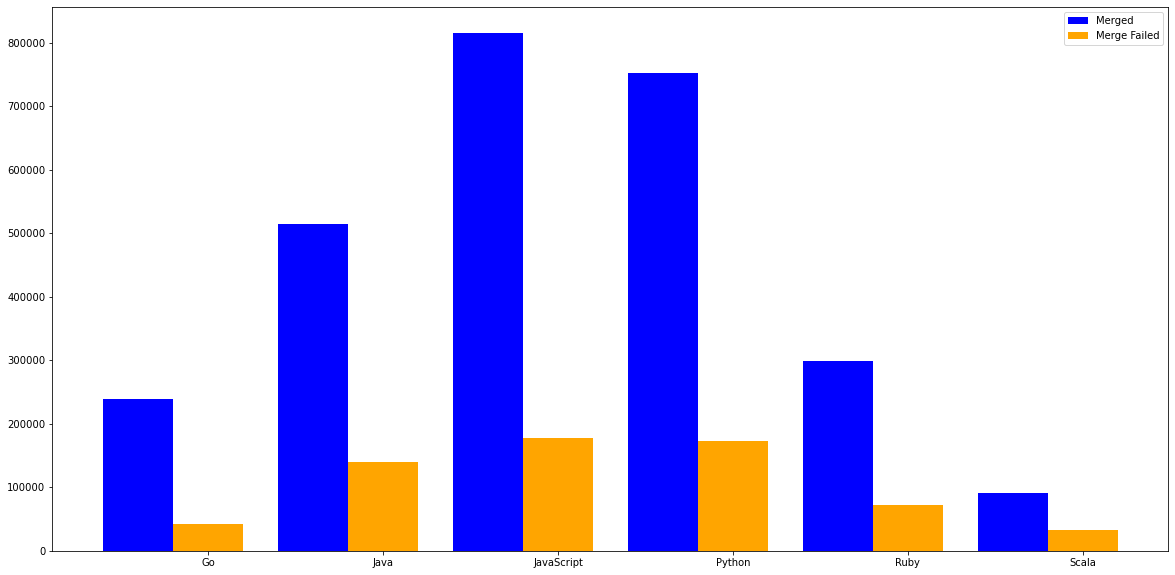

In [19]:
not_merge = crosstab.iloc[0][0:6].values.tolist()
merge = crosstab.iloc[1][0:6].values.tolist()
language_name = ['Go', 'Java', 'JavaScript', 'Python', 'Ruby', 'Scala']
picture_double_bar(merge, not_merge, language_name)

## Association Rules

In [20]:
language_merge = program_language_merge=Project_feature_data[['language','merged_or_not']]
language_merge_list=language_merge.values.tolist()
for i in range(len(language_merge_list)):
    if language_merge_list[i][1]==1:
        language_merge_list[i][1] = 'Merged'
    else:
        language_merge_list[i][1] = 'Merge Failed'

In [21]:
language_merge

,language,merged_or_not
0,JavaScript,1
1,Python,0
2,JavaScript,1
3,Go,1
4,Python,1
...,...,...
3347932,JavaScript,1
3347933,Python,0
3347934,JavaScript,1
3347935,JavaScript,0


In [85]:
language_merge_list

[['JavaScript', 'Merged'],
 ['Python', 'Merge Failed'],
 ['JavaScript', 'Merged'],
 ['Go', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merge Failed'],
 ['Scala', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Go', 'Merged'],
 ['Java', 'Merged'],
 ['Java', 'Merge Failed'],
 ['Scala', 'Merge Failed'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['Python', 'Merged'],
 ['Go', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Python', 'Merge Failed'],
 ['Go', 'Merged'],
 ['Java', 'Merged'],
 ['JavaScript', 'Merge Failed'],
 ['Python', 'Merged'],
 ['Python', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Ruby', 'Merged'],
 ['JavaScript', 'Merged'],
 ['Ruby', 'Merge Failed'],
 ['Pytho

In [22]:
te = TransactionEncoder()
df_tf = te.fit_transform(language_merge_list)
df = pd.DataFrame(df_tf,columns=te.columns_)
df.drop('Merge Failed',axis=1,inplace=True)
frequent_itemsets = apriori(df,min_support=0.001,use_colnames= True)
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.15)
rules.drop(index=[2,3,5],inplace=True)

In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Go),(Merged),0.083987,0.809482,0.071530,0.851677,1.052125,0.003544,1.284475
1,(Merged),(Java),0.809482,0.195255,0.153487,0.189611,0.971096,-0.004568,0.993036
4,(Merged),(JavaScript),0.809482,0.296695,0.243488,0.300795,1.013817,0.003319,1.005863
6,(Python),(Merged),0.276134,0.809482,0.224566,0.813251,1.004656,0.001041,1.020182
7,(Ruby),(Merged),0.110827,0.809482,0.089151,0.804418,0.993743,-0.000561,0.974105
8,(Scala),(Merged),0.037103,0.809482,0.027261,0.734735,0.907660,-0.002773,0.718215


In [24]:
lift = rules['lift'].values.tolist()
lift_list=sorted(lift)
lift_name = ['Scala','Java','Ruby','Python','JavaScript','Go']

Text(0, 0.5, 'Lift')

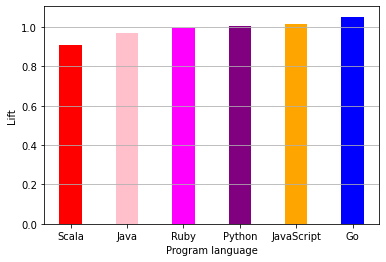

In [25]:
fig1 = plt.figure()
plt.grid(axis='y')
plt.bar(lift_name,lift_list,0.4,color=colors)

plt.xlabel('Program language')
plt.ylabel('Lift')

## Extracting pull request requests from JavaScript, Python and Java

In [73]:
more_language = program_language_merge[
    (program_language_merge['language'] == 'JavaScript') |
    (program_language_merge['language'] == 'Java') |
    (program_language_merge['language'] == 'Python')]

In [76]:
crosstab_more_language = pd.crosstab(index=more_language['merged_or_not'],
                       columns=more_language['language'],
                       margins=True)

In [79]:
crosstab_more_language

language,Java,JavaScript,Python,All
merged_or_not,,,,
0,139836,178134,172645,490615
1,513864,815182,751833,2080879
All,653700,993316,924478,2571494


In [80]:
obs_more_language = np.array([
    crosstab_more_language.iloc[0][0:3].values,
    crosstab_more_language.iloc[1][0:3].values
])

Chi_Square__more_language = stats.chi2_contingency(obs_more_language)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square__more_language)

chisq-statistic=3206.5596, p-value=0.0000, df=2 expected_frep=[[124719.33650244 189514.62820446 176381.0352931 ]
 [528980.66349756 803801.37179554 748096.9647069 ]]


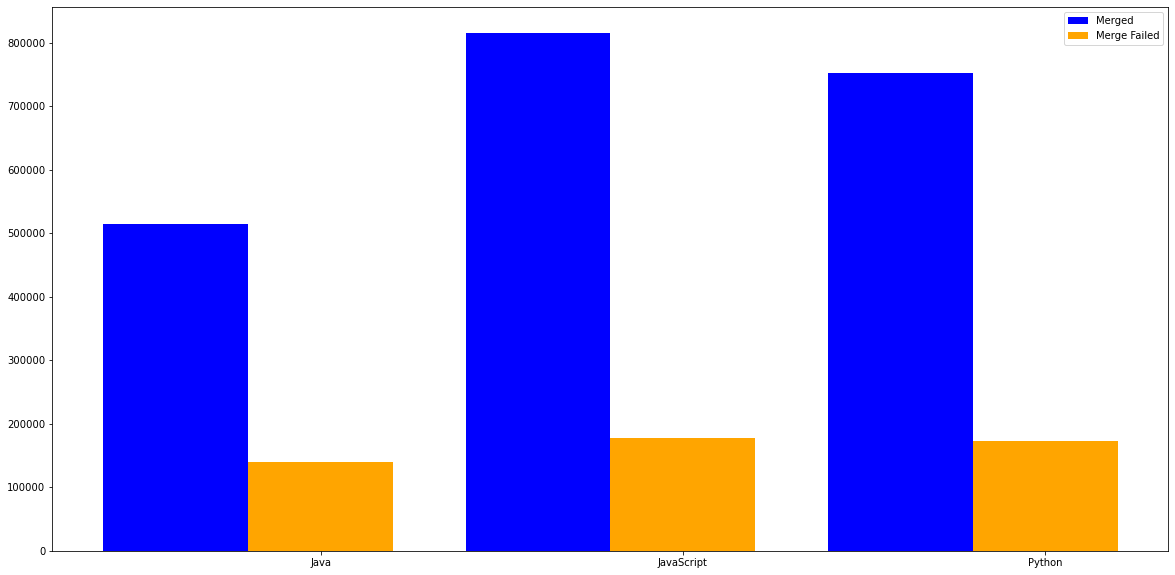

In [83]:
not_merge_more_language = crosstab_more_language.iloc[0][0:3].values.tolist()
merge_more_language = crosstab_more_language.iloc[1][0:3].values.tolist()
language_name_more_language = ['Java', 'JavaScript', 'Python']
picture_double_bar(merge_more_language, not_merge_more_language,
                   language_name_more_language)

## Association Rules for JavaScript Java and Python

In [86]:
more_language_merge_list = more_language.values.tolist()
for i in range(len(more_language_merge_list)):
    if more_language_merge_list[i][1] == 1:
        more_language_merge_list[i][1] = 'Merged'
    else:
        more_language_merge_list[i][1] = 'Merge Failed'

In [98]:
df_tf_more_language = te.fit_transform(more_language_merge_list)
df_more_language = pd.DataFrame(df_tf_more_language, columns=te.columns_)
df_more_language.drop('Merge Failed', axis=1, inplace=True)
frequent_itemsets_more_language = apriori(df_more_language,
                                          min_support=0.05,
                                          use_colnames=True)
rules_more_language = association_rules(frequent_itemsets_more_language,
                                        metric='confidence',
                                        min_threshold=0.15)
rules_more_language.drop(index=[0, 3, 4], inplace=True)

In [99]:
frequent_itemsets_more_language

,support,itemsets
0,0.254210,(Java)
1,0.386280,(JavaScript)
2,0.809210,(Merged)
3,0.359510,(Python)
4,0.199831,"(Merged, Java)"
5,0.317007,"(JavaScript, Merged)"
6,0.292372,"(Merged, Python)"


In [93]:
rules_more_language

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Java),(Merged),0.25421,0.80921,0.199831,0.786085,0.971423,-0.005879,0.891897
2,(JavaScript),(Merged),0.38628,0.80921,0.317007,0.820667,1.014159,0.004426,1.063888
5,(Python),(Merged),0.35951,0.80921,0.292372,0.813251,1.004994,0.001453,1.021640


# Characteristics2:Popularity of project

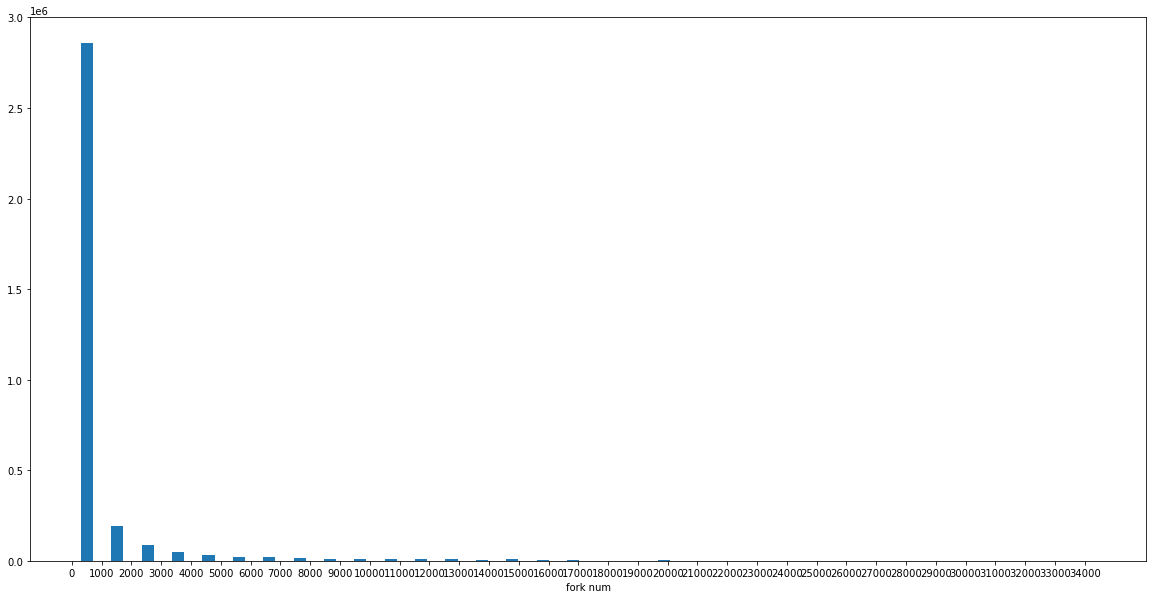

In [26]:
popu_of_pro = Project_feature_data[['fork_num', 'merged_or_not']]
fork_num = popu_of_pro['fork_num'].values.tolist()
bin = int((max(fork_num) - min(fork_num)) / 1000)
picturehist(fork_num, min(fork_num), max(fork_num), 1000, bin, 0.4, 'fork num')

In [147]:
popu_of_pro

,fork_num,merged_or_not
0,140,1
1,1,0
2,11,1
3,269,1
4,64,1
...,...,...
3347932,0,1
3347933,2454,0
3347934,125,1
3347935,84,0


In [27]:
u=popu_of_pro['fork_num'].mean()
std = popu_of_pro['fork_num'].std()
stats.kstest(popu_of_pro['fork_num'],'norm',(u,std))

KstestResult(statistic=0.36532336081696126, pvalue=0.0)

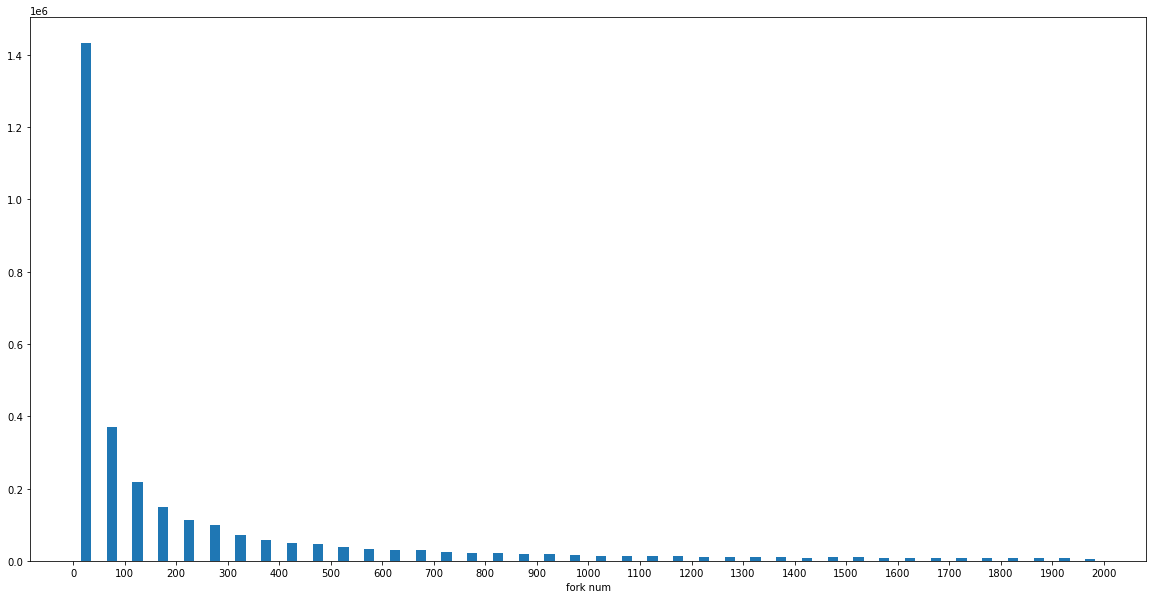

In [28]:
fork_num_low_2000 =popu_of_pro[popu_of_pro['fork_num']<2000]['fork_num'].values.tolist()
picturehist(fork_num_low_2000,0,2100,100,40,0.4,'fork num',)

In [29]:
fork_num_50=popu_of_pro[popu_of_pro['fork_num']<=50].values.tolist()
fork_num_100=popu_of_pro[(popu_of_pro['fork_num']>50)&(popu_of_pro['fork_num']<=100)].values.tolist()
fork_num_200=popu_of_pro[(popu_of_pro['fork_num']>100)&(popu_of_pro['fork_num']<=200)].values.tolist()
fork_num_300=popu_of_pro[(popu_of_pro['fork_num']>200)&(popu_of_pro['fork_num']<=300)].values.tolist()
fork_num_500=popu_of_pro[(popu_of_pro['fork_num']>300)&(popu_of_pro['fork_num']<=500)].values.tolist()
fork_num_1000=popu_of_pro[(popu_of_pro['fork_num']>500)&(popu_of_pro['fork_num']<=1000)].values.tolist()
fork_num_2000=popu_of_pro[(popu_of_pro['fork_num']>1000)&(popu_of_pro['fork_num']<=2000)].values.tolist()
fork_num_3000=popu_of_pro[(popu_of_pro['fork_num']>2000)&(popu_of_pro['fork_num']<=3000)].values.tolist()
fork_num_more_3000=popu_of_pro[popu_of_pro['fork_num']>3000].values.tolist()

In [30]:
list_50=count(fork_num_50)
list_100=count(fork_num_100)
list_200=count(fork_num_200)
list_300=count(fork_num_300)
list_500=count(fork_num_500)
list_1000=count(fork_num_1000)
list_2000=count(fork_num_2000)
list_3000=count(fork_num_3000)
list_more_3000=count(fork_num_more_3000)

In [31]:
fork_num_merge_or_not = pd.DataFrame({
                        '0-50': list_50,
                        '50-100': list_100,
                        '100-200': list_200,
                        '200-300': list_300,
                        '300-500': list_500,
                        '500-1000': list_1000,
                        '1000-2000':list_2000,
                        '2000-3000':list_3000,
                        '>3000':list_more_3000
                         })
fork_num_merge_or_not['ALL'] = fork_num_merge_or_not.apply(lambda x: x.sum(), axis=1)
fork_num_merge_or_not.loc['ALL'] = fork_num_merge_or_not.apply(lambda x: x.sum())

In [32]:
fork_num_merge_or_not

,0-50,50-100,100-200,200-300,300-500,500-1000,1000-2000,2000-3000,>3000,ALL
0,1242840,300934,295282,168010,174454,187417,135678,63529,141952,2710096
1,199689,63250,68325,41670,49796,61055,56344,26344,71368,637841
ALL,1442529,364184,363607,209680,224250,248472,192022,89873,213320,3347937


## Chi-Square Test

In [33]:
obs_fork = np.array([fork_num_merge_or_not.iloc[0][0:9].values,fork_num_merge_or_not.iloc[1][0:9].values])
Chi_Square_fork = stats.chi2_contingency(obs_fork)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square_fork)

chisq-statistic=80531.2029, p-value=0.0000, df=8 expected_frep=[[1167701.80346404  294800.52989767  294333.45856628  169732.26475886
   181526.42298825  201133.70511811  155438.42495005   72750.60964648
   172678.78061027]
 [ 274827.19653596   69383.47010233   69273.54143372   39947.73524114
    42723.57701175   47338.29488189   36583.57504995   17122.39035352
    40641.21938973]]


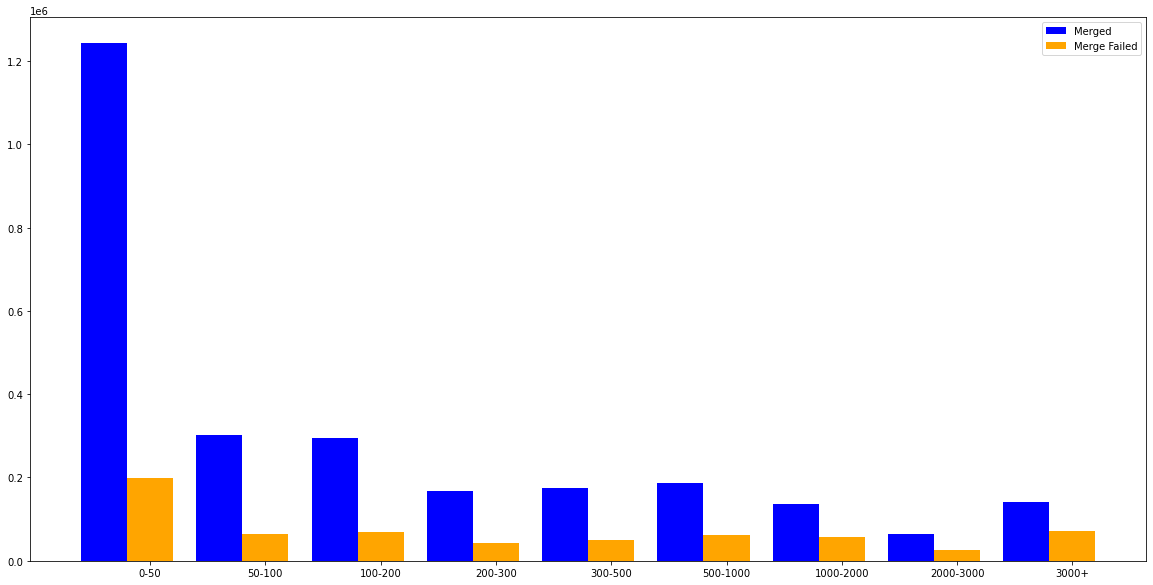

In [34]:
fork_Merged=fork_num_merge_or_not.iloc[0][0:9].values.tolist()
fork_Merge_Failed=fork_num_merge_or_not.iloc[1][0:9].values.tolist()
fork_name = ['0-50','50-100','100-200','200-300','300-500','500-1000','1000-2000','2000-3000','3000+']
picture_double_bar(fork_Merged,fork_Merge_Failed,fork_name)

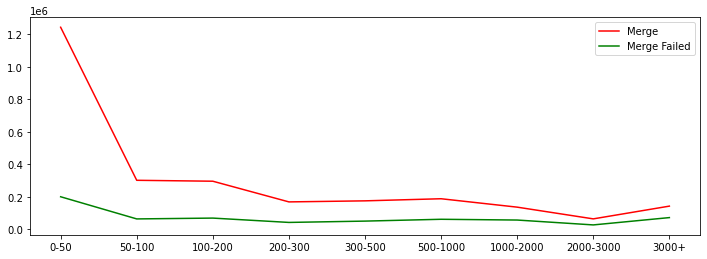

In [35]:
picture_double_plot(fork_Merged,fork_Merge_Failed,fork_name)

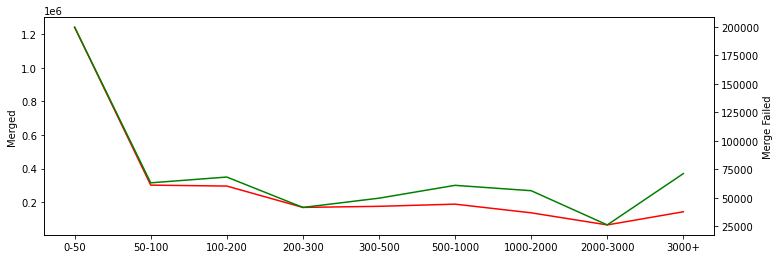

In [36]:
picture_sameX_plot(fork_Merged,fork_Merge_Failed,fork_name)

# Characteristics3:Age of project

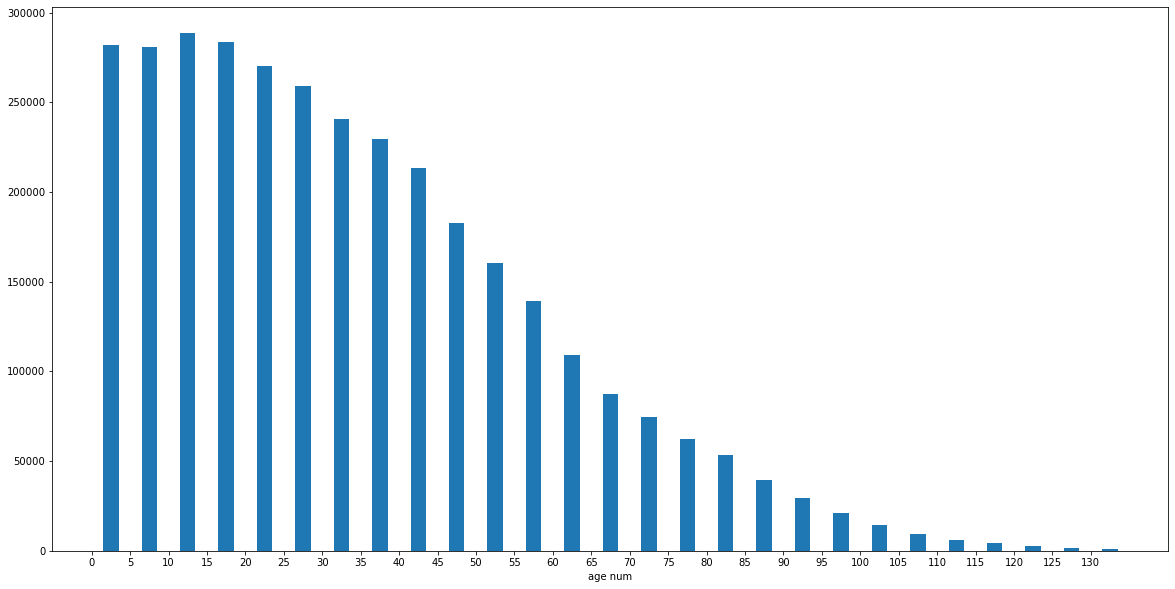

In [37]:
age_of_pro = Project_feature_data[['project_age','merged_or_not']]
age= age_of_pro[age_of_pro['project_age']>=0]
age_num = age['project_age'].values.tolist()
bin=int((max(age_num)-min(age_num))/5)
picturehist(age_num,min(age_num),max(age_num),5,bin,0.4,'age num')

In [38]:
u=age_of_pro['project_age'].mean()
std = age_of_pro['project_age'].std()
stats.kstest(age_of_pro['project_age'],'norm',(u,std))

KstestResult(statistic=0.0824207738465814, pvalue=0.0)

In [39]:
age_num_10=age_of_pro[age_of_pro['project_age']<=10].values.tolist()
age_num_20=age_of_pro[(age_of_pro['project_age']>10)&(age_of_pro['project_age']<=20)].values.tolist()
age_num_30=age_of_pro[(age_of_pro['project_age']>20)&(age_of_pro['project_age']<=30)].values.tolist()
age_num_40=age_of_pro[(age_of_pro['project_age']>30)&(age_of_pro['project_age']<=40)].values.tolist()
age_num_50=age_of_pro[(age_of_pro['project_age']>40)&(age_of_pro['project_age']<=50)].values.tolist()
age_num_60=age_of_pro[(age_of_pro['project_age']>50)&(age_of_pro['project_age']<=60)].values.tolist()
age_num_70=age_of_pro[(age_of_pro['project_age']>60)&(age_of_pro['project_age']<=70)].values.tolist()
age_num_80=age_of_pro[(age_of_pro['project_age']>70)&(age_of_pro['project_age']<=80)].values.tolist()
age_num_90=age_of_pro[(age_of_pro['project_age']>80)&(age_of_pro['project_age']<=90)].values.tolist()
age_num_100=age_of_pro[(age_of_pro['project_age']>90)&(age_of_pro['project_age']<=100)].values.tolist()
age_num_110=age_of_pro[(age_of_pro['project_age']>100)&(age_of_pro['project_age']<=110)].values.tolist()
age_num_120=age_of_pro[(age_of_pro['project_age']>110)&(age_of_pro['project_age']<=120)].values.tolist()
age_num_130=age_of_pro[(age_of_pro['project_age']>120)&(age_of_pro['project_age']<=130)].values.tolist()
age_num_more_130=age_of_pro[age_of_pro['project_age']>130].values.tolist()

In [40]:
age_list_10=count(age_num_10)
age_list_20=count(age_num_20)
age_list_30=count(age_num_30)
age_list_40=count(age_num_40)
age_list_50=count(age_num_50)
age_list_60=count(age_num_60)
age_list_70=count(age_num_70)
age_list_80=count(age_num_80)
age_list_90=count(age_num_90)
age_list_100=count(age_num_100)
age_list_110=count(age_num_110)
age_list_120=count(age_num_120)
age_list_130=count(age_num_130)
age_list_more_130=count(age_num_more_130)

In [41]:
age_num_merge_or_not = pd.DataFrame({
                        '0-10': age_list_10,
                        '10-20': age_list_20,
                        '20-30': age_list_30,
                        '30-40': age_list_40,
                        '40-50': age_list_50,
                        '50-60': age_list_60,
                        '60-70':age_list_70,
                        '70-80':age_list_80,
                        '80-90':age_list_90,
                        '90-100':age_list_100,
                        '100-110':age_list_110,
                        '110-120':age_list_120,
                        '120-130':age_list_130,
                        '>130':age_list_more_130
                         })
age_num_merge_or_not['ALL'] = age_num_merge_or_not.apply(lambda x: x.sum(), axis=1)
age_num_merge_or_not.loc['ALL'] = age_num_merge_or_not.apply(lambda x: x.sum())

In [42]:
age_num_merge_or_not

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,>130,ALL
0,518766,460875,421064,374748,308645,231256,151072,106213,70840,37789,17432,7786,3132,478,2710096
1,100765,110471,102008,90140,75826,59948,37545,26890,17281,9407,4438,2366,658,98,637841
ALL,619531,571346,523072,464888,384471,291204,188617,133103,88121,47196,21870,10152,3790,576,3347937


In [43]:
obs_age = np.array([age_num_merge_or_not.iloc[0][0:14].values,age_num_merge_or_not.iloc[1][0:14].values])
Chi_Square_age = stats.chi2_contingency(obs_age)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square_age)

chisq-statistic=4204.3426, p-value=0.0000, df=13 expected_frep=[[5.01499426e+05 4.62494518e+05 4.23417566e+05 3.76318643e+05
  3.11222499e+05 2.35724506e+05 1.52682137e+05 1.07744533e+05
  7.13323965e+04 3.82043303e+04 1.77033796e+04 8.21786509e+03
  3.06793821e+03 4.66261849e+02]
 [1.18031574e+05 1.08851482e+05 9.96544342e+04 8.85693568e+04
  7.32485011e+04 5.54794940e+04 3.59348625e+04 2.53584672e+04
  1.67886035e+04 8.99166975e+03 4.16662042e+03 1.93413491e+03
  7.22061792e+02 1.09738151e+02]]


In [44]:
age_Merged=age_num_merge_or_not.iloc[0][0:14].values.tolist()
age_Merge_Failed=age_num_merge_or_not.iloc[1][0:14].values.tolist()
age_name = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130+']

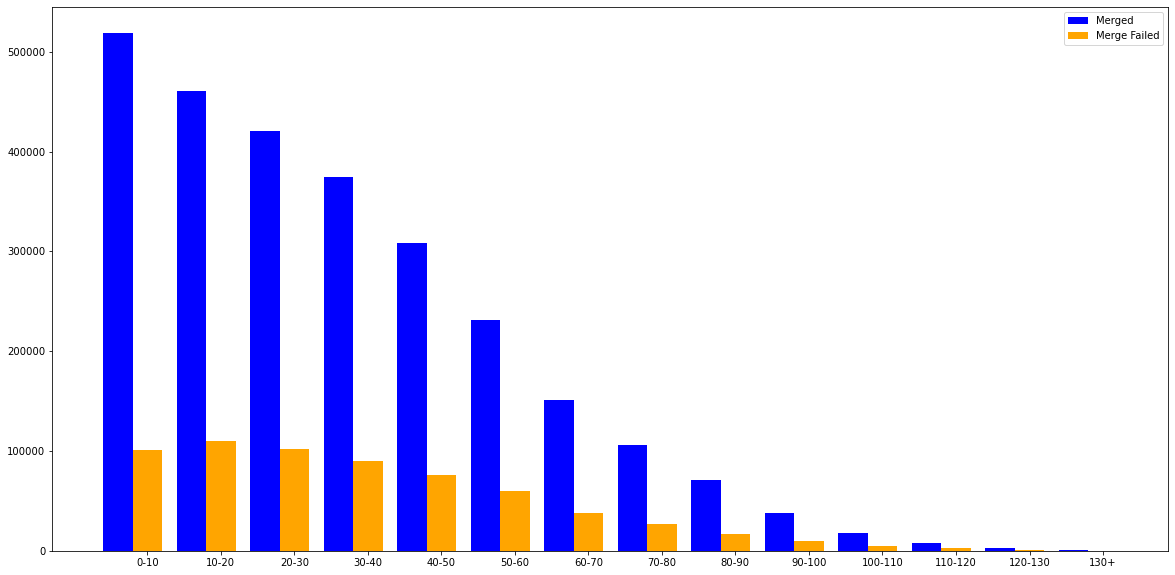

In [45]:
picture_double_bar(age_Merged,age_Merge_Failed,age_name)

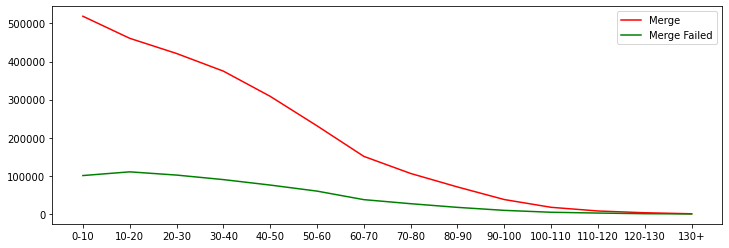

In [46]:
picture_double_plot(age_Merged,age_Merge_Failed,age_name)

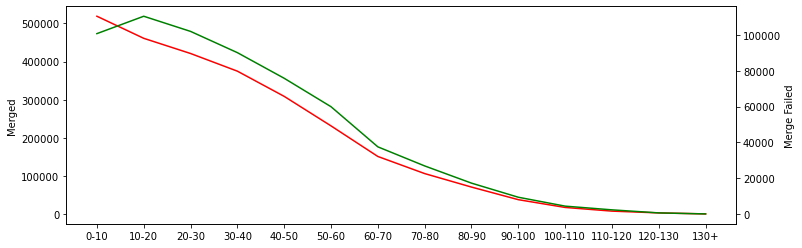

In [47]:
picture_sameX_plot(age_Merged,age_Merge_Failed,age_name)

# Characteristics4:Workload of a project

In [48]:
workload_of_project = Project_feature_data[['open_pr_num','merged_or_not']]
workload_of_project

,open_pr_num,merged_or_not
0,25,1
1,7,0
2,10,1
3,29,1
4,9,1
...,...,...
3347932,0,1
3347933,372,0
3347934,8,1
3347935,0,0


Ks-test

In [101]:
u=workload_of_project['open_pr_num'].mean()
std = workload_of_project['open_pr_num'].std()
stats.kstest(workload_of_project['open_pr_num'],'norm',(u,std))

KstestResult(statistic=0.39178113595701985, pvalue=0.0)

## Chi-Square Test

In [106]:
workload_10=workload_of_project[workload_of_project['open_pr_num']<=10].values.tolist()
workload_20=workload_of_project[(workload_of_project['open_pr_num']>10)&(workload_of_project['open_pr_num']<=20)].values.tolist()
workload_30=popu_of_pro[(workload_of_project['open_pr_num']>20)&(workload_of_project['open_pr_num']<=30)].values.tolist()
workload_40=popu_of_pro[(workload_of_project['open_pr_num']>30)&(workload_of_project['open_pr_num']<=40)].values.tolist()
workload_50=popu_of_pro[(workload_of_project['open_pr_num']>40)&(workload_of_project['open_pr_num']<=50)].values.tolist()
workload_100=popu_of_pro[(workload_of_project['open_pr_num']>50)&(workload_of_project['open_pr_num']<=100)].values.tolist()
workload_200=popu_of_pro[(workload_of_project['open_pr_num']>100)&(workload_of_project['open_pr_num']<=200)].values.tolist()
workload_300=popu_of_pro[(workload_of_project['open_pr_num']>200)&(workload_of_project['open_pr_num']<=300)].values.tolist()
workload_400=popu_of_pro[(workload_of_project['open_pr_num']>300)&(workload_of_project['open_pr_num']<=400)].values.tolist()
workload_500=popu_of_pro[(workload_of_project['open_pr_num']>400)&(workload_of_project['open_pr_num']<=500)].values.tolist()
workload_1000=popu_of_pro[(workload_of_project['open_pr_num']>500)&(workload_of_project['open_pr_num']<=1000)].values.tolist()
workload_1500=popu_of_pro[(workload_of_project['open_pr_num']>1000)&(workload_of_project['open_pr_num']<=1500)].values.tolist()
workload_2000=popu_of_pro[(workload_of_project['open_pr_num']>1500)&(workload_of_project['open_pr_num']<=2000)].values.tolist()
workload_more_2000=workload_of_project[workload_of_project['open_pr_num']>2000].values.tolist()

In [107]:
workload_10_list=count(workload_10)
workload_20_list=count(workload_20)
workload_30_list=count(workload_30)
workload_40_list=count(workload_40)
workload_50_list=count(workload_50)
workload_100_list=count(workload_100)
workload_200_list=count(workload_200)
workload_300_list=count(workload_300)
workload_400_list=count(workload_400)
workload_500_list=count(workload_500)
workload_1000_list=count(workload_1000)
workload_1500_list=count(workload_1500)
workload_2000_list=count(workload_2000)
workload_more_2000_list=count(workload_more_2000)

In [183]:
workload_merge_or_not = pd.DataFrame({
    '0-10': workload_10_list,
    '10-20': workload_20_list,
    '20-30': workload_30_list,
    '30-40': workload_40_list,
    '40-50': workload_50_list,
    '50-100': workload_100_list,
    '100-200': workload_200_list,
    '200-300': workload_300_list,
    '300-400': workload_400_list,
    '400-500': workload_500_list,
    '500-1000': workload_1000_list,
    '1000-1500': workload_1500_list,
    '1500-2000': workload_2000_list,
    '>2000': workload_more_2000_list
})
workload_merge_or_not['ALL'] = workload_merge_or_not.apply(lambda x: x.sum(),
                                                           axis=1)
workload_merge_or_not.loc['ALL'] = workload_merge_or_not.apply(
    lambda x: x.sum())


In [184]:
workload_merge_or_not.loc[0]/workload_merge_or_not.loc['ALL']

0-10         0.856725
10-20        0.816481
20-30        0.799725
30-40        0.788164
40-50        0.781313
50-100       0.775104
100-200      0.749443
200-300      0.760034
300-400      0.665486
400-500      0.573993
500-1000     0.597705
1000-1500    0.617825
1500-2000    0.671087
>2000        0.769753
ALL          0.809482
dtype: float64

In [185]:
workload_merge_or_not.loc['merged Percent'] = workload_merge_or_not.loc[0]/workload_merge_or_not.loc['ALL']
workload_merge_or_not.loc['merge failed Percent'] = workload_merge_or_not.loc[1]/workload_merge_or_not.loc['ALL']

In [186]:
workload_merge_or_not.loc['ALL']

0-10         1517073.0
10-20         462246.0
20-30         261121.0
30-40         174970.0
40-50         131494.0
50-100        336506.0
100-200       197356.0
200-300        57129.0
300-400        36692.0
400-500        30192.0
500-1000       77110.0
1000-1500      34165.0
1500-2000      21720.0
>2000          10163.0
ALL          3347937.0
Name: ALL, dtype: float64

In [192]:
workload_merge_or_not.to_excel(excel_writer='workload count.xlsx')

In [193]:
workload_merge_or_not

,0-10,10-20,20-30,30-40,40-50,50-100,100-200,200-300,300-400,400-500,500-1000,1000-1500,1500-2000,>2000,ALL
0,1.299715e+06,377415.000000,208825.000000,137905.000000,102738.000000,260827.000000,147907.000000,43420.000000,24418.000000,17330.000000,46089.000000,21108.000000,14576.000000,7823.000000,2.710096e+06
1,2.173580e+05,84831.000000,52296.000000,37065.000000,28756.000000,75679.000000,49449.000000,13709.000000,12274.000000,12862.000000,31021.000000,13057.000000,7144.000000,2340.000000,6.378410e+05
ALL,1.517073e+06,462246.000000,261121.000000,174970.000000,131494.000000,336506.000000,197356.000000,57129.000000,36692.000000,30192.000000,77110.000000,34165.000000,21720.000000,10163.000000,3.347937e+06
merged Percent,8.567254e-01,0.816481,0.799725,0.788164,0.781313,0.775104,0.749443,0.760034,0.665486,0.573993,0.597705,0.617825,0.671087,0.769753,8.094824e-01
merge failed Percent,1.432746e-01,0.183519,0.200275,0.211836,0.218687,0.224896,0.250557,0.239966,0.334514,0.426007,0.402295,0.382175,0.328913,0.230247,1.905176e-01


In [110]:
obs_workload = np.array([workload_merge_or_not.iloc[0][0:14].values,workload_merge_or_not.iloc[1][0:14].values])
Chi_Square_workload= stats.chi2_contingency(obs_workload)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s' %
      Chi_Square_workload)

chisq-statistic=80706.7934, p-value=0.0000, df=13 expected_frep=[[1228043.85775718  374179.99072742  211372.84770173  141635.13146155
   106442.07564957  272395.67667372  159756.20394768   46244.91870188
    29701.52736805   24439.89191911   62419.1860719    27655.96540198
    17581.95722321    8226.769395  ]
 [ 289029.14224282   88066.00927258   49748.15229827   33334.86853845
    25051.92435043   64110.32332628   37599.79605232   10884.08129812
     6990.47263195    5752.10808089   14690.8139281     6509.03459802
     4138.04277679    1936.230605  ]]


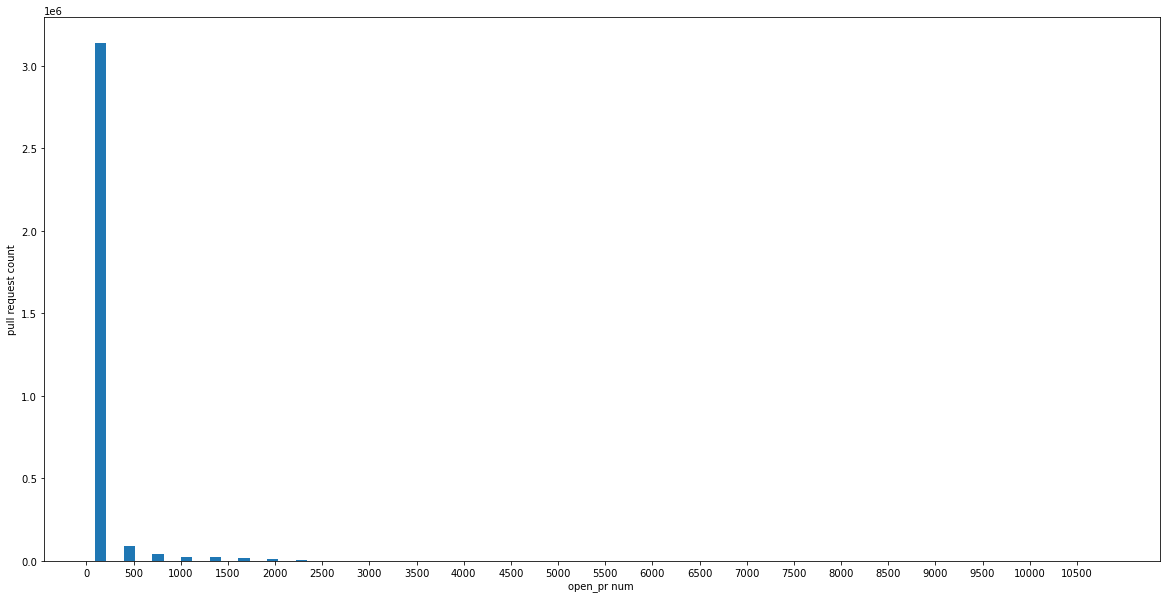

In [118]:
workload_num = workload_of_project['open_pr_num'].values.tolist()
bin=int((max(workload_num)-min(workload_num))/300)
picturehist(workload_num,min(workload_num),max(workload_num),500,bin,0.4,'open_pr num ','pull request count','workload count')

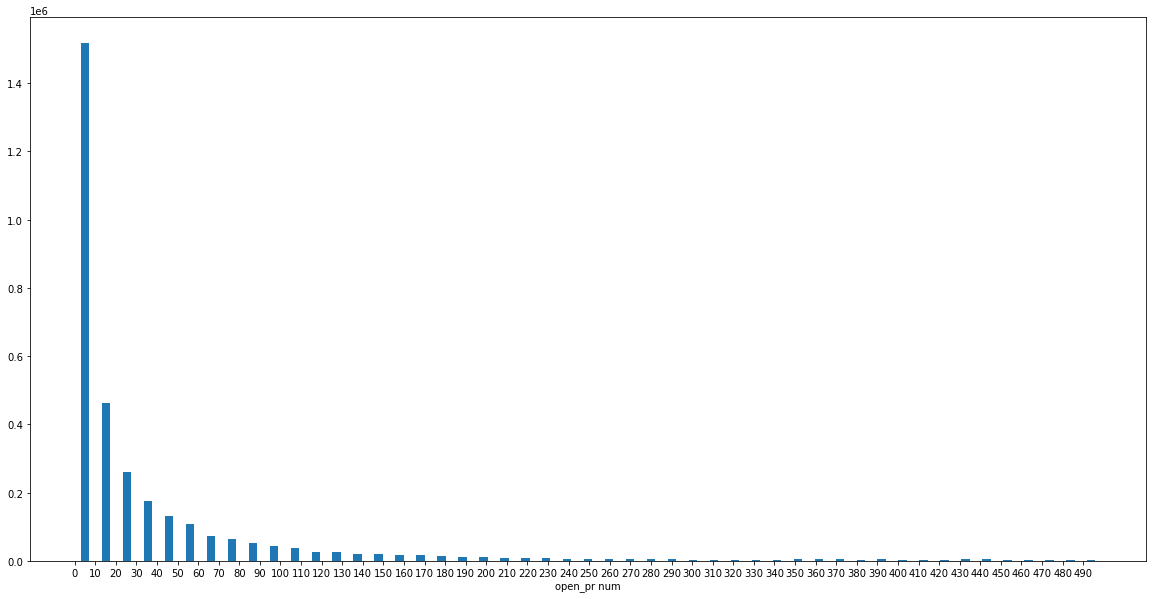

In [51]:
workload_num_low_500 =workload_of_project[workload_of_project['open_pr_num']<500]['open_pr_num'].values.tolist()
bin=int((max(workload_num_low_500)-min(workload_num_low_500))/10)
picturehist(workload_num_low_500,min(workload_num_low_500),max(workload_num_low_500),10,bin,0.4,'open_pr num',)

# Characteristics5：Activeness of project and Characteristics6：Openness of a project

In [52]:
feature = Project_feature_data[['pushed_delta','pr_succ_rate','open_issue_num','fork_num','merged_or_not']]

Find the missing value

In [53]:
feature.isna().sum()

pushed_delta      20542
pr_succ_rate      10203
open_issue_num        0
fork_num              0
merged_or_not         0
dtype: int64

Missing value padding

In [54]:
feature.fillna(feature.mean(),inplace=True)

/Users/haoyuwang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Logistic regression and cross validation processing

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

Standardized processing and division of test set training set

In [56]:
std_scale = preprocessing.StandardScaler().fit(feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
X = std_scale.transform(feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
Y= np.array(feature['merged_or_not'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [57]:
lr_l1=linear_model.LogisticRegression(penalty='l1',solver='liblinear',multi_class ='ovr')
lr_l2=linear_model.LogisticRegression(penalty='l2',solver='liblinear',multi_class ='ovr')

In [58]:
def muti_score(model,trainX,trainY):
        accuracy = cross_val_score(model, trainX, trainY, scoring='accuracy', cv=5)
        f1_score = cross_val_score(model, trainX, trainY, scoring='f1', cv=5)
        auc = cross_val_score(model, trainX, trainY,scoring='roc_auc', cv=5)
        print("accuracy mean:",accuracy.mean())
        print("accuracy std dev:",accuracy.std())
        print("F1_score mean:",f1_score.mean())
        print("F1_score std dev:",f1_score.std())
        print("AUC:",auc.mean())

In [59]:
muti_score(lr_l1,X_train,y_train)

accuracy mean: 0.8083696337761517
accuracy std dev: 0.0002051345701263814
F1_score mean: 0.8935776185616776
F1_score std dev: 0.0001198455445901965
AUC: 0.6081069458530906


In [60]:
muti_score(lr_l2,X_train,y_train)

accuracy mean: 0.8083685136835573
accuracy std dev: 0.00020712850565742026
F1_score mean: 0.893577256552079
F1_score std dev: 0.00012099251380479988
AUC: 0.6081054491521306


Feature Refinement

In [61]:
new_feature =feature
new_feature['fork_num']=new_feature['fork_num'].apply(lambda x:np.log(x+1))

<ipython-input-61-29978a34f184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feature['fork_num']=new_feature['fork_num'].apply(lambda x:np.log(x+1))


In [62]:
new_feature

,pushed_delta,pr_succ_rate,open_issue_num,fork_num,merged_or_not
0,196583.0,0.978469,52,4.948760,1
1,9.0,1.000000,1,0.693147,0
2,5743.0,0.996324,0,2.484907,1
3,978.0,0.986523,212,5.598422,1
4,517153.0,0.978495,93,4.174387,1
...,...,...,...,...,...
3347932,18087.0,1.000000,2,0.000000,1
3347933,431.0,0.965155,3359,7.805882,0
3347934,78766.0,0.992126,62,4.836282,1
3347935,995650.0,0.991597,174,4.442651,0


In [63]:
new_std_scale = preprocessing.StandardScaler().fit(new_feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
new_X = new_std_scale.transform(new_feature[['pushed_delta','pr_succ_rate','open_issue_num','fork_num']])
new_Y= np.array(new_feature['merged_or_not'])
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=0)

In [64]:
muti_score(lr_l1,new_X_train,new_y_train)

accuracy mean: 0.8099848078052798
accuracy std dev: 0.00011191300483557924
F1_score mean: 0.894820476435102
F1_score std dev: 6.413837604259547e-05
AUC: 0.6247177124899177


In [65]:
muti_score(lr_l2,new_X_train,new_y_train)

accuracy mean: 0.8099840610768835
accuracy std dev: 0.00011230297599009236
F1_score mean: 0.89482001961721
F1_score std dev: 6.435599840664478e-05
AUC: 0.6247176670693266


In [66]:
lr_l1.fit(X_train, y_train)
print(lr_l1.coef_)

[[-0.00427346  0.22950627  0.08354718 -0.23721868]]


In [67]:
lr_l1.fit(new_X_train,new_y_train)
lr_l1.coef_

array([[-0.03023492,  0.19787792,  0.10627989, -0.41827386]])